## White Balancing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io 

### White Patch Algorithm

In [3]:
lily = skimage.io.imread('https://miro.medium.com/max/720/1*JTNQno0wSfLY7hO8ut96NA.jpeg')

HTTPError: HTTP Error 403: Forbidden

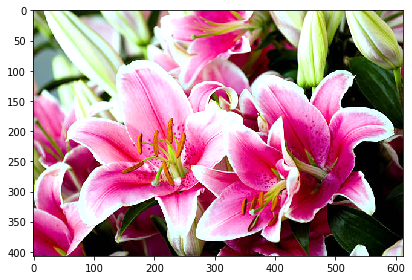

In [5]:
def white_patch(image, percentile=100):
    """
    White balance image using White patch algorithm
    Parameters
    ----------
    image : numpy array
            Image to white balance
    percentile : integer, optional
                  Percentile value to consider as channel maximum
    Returns
    -------
    image_wb : numpy array
               White-balanced image
    """
    white_patch_image = skimage.img_as_ubyte((image*1.0 / 
                                   np.percentile(image,percentile,
                                   axis=(0, 1))).clip(0, 1))
    return white_patch_image
#call the function to implement white patch algorithm
skimage.io.imshow(white_patch(lily, 85))

### Gray Worth

In [9]:
def gray_world(image):
    """
    White balance image using Gray-world algorithm
    Parameters
    ----------
    image : numpy array
            Image to white balance
    
    Returns
    -------
    image_wb : numpy array   
               White-balanced image
    """
    image_grayworld = ((image * (skimage.access.mean() / 
                      image.mean(axis=(0,1)))).
                      clip(0,255).astype(int))
    # for images having a transparency channel
    
    if image.shape[2] == 4:
        image_grayworld[:,:,3] = 255
    return image_grayworld
#call the function to implement gray world algorithm
skimage.io.imshow(gray_world(lily))

AttributeError: No skimage attribute access

### Ground Truth

NameError: name 'lily' is not defined

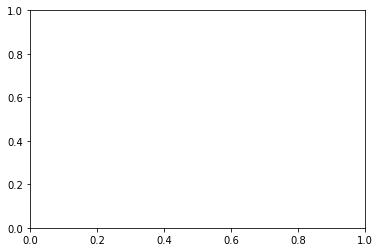

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.imshow(lily)
ax.add_patch(Rectangle((650, 550), 100, 100, edgecolor='b', facecolor='none'));


def ground_truth(image, patch, mode='mean'):   
   """
   White balance image using Ground-truth algorithm
   Parameters
   ----------
   image : numpy array
           Image to white balancr
   patch : numpy array
           Patch of "true" white
   mode : mean or max, optional
          Adjust mean or max of each channel to match patch
  
   Returns
   -------
   
   image_wb : numpy array
              White-balanced image
   """
   image_patch = img_patch
   if mode == 'mean':
      image_gt = ((image * (image_patch.mean() / \
                   image.mean(axis=(0, 1))))\
                   .clip(0, 255)\
                   .astype(int))
   if mode == 'max':
      image_gt = ((image * 1.0 / image_patch.max(axis(0,1))).clip(0, 1))
   #transparency channel
   if image.shape[2] == 4:
      image_gt[:,:,3] = 255
   return image_gt 

skimage.io.imshow(ground_truth(lily, img_patch, 'max'))